In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings

%matplotlib inline

In [2]:
dframe=pd.read_csv("C:/Users/RICHA/Downloads/CarPrice_Assignment.csv")
dframe

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## PLOTTING

Visualizing the data by individually plotting different features

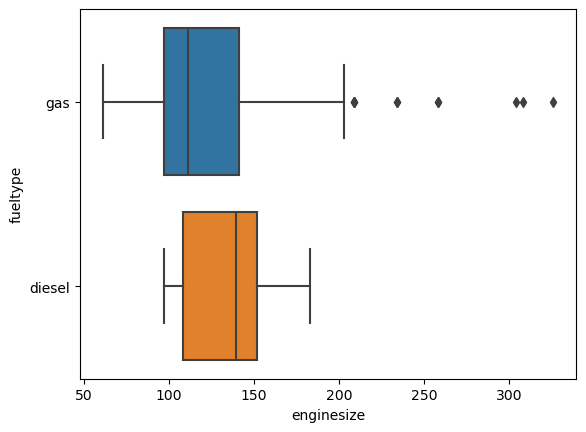

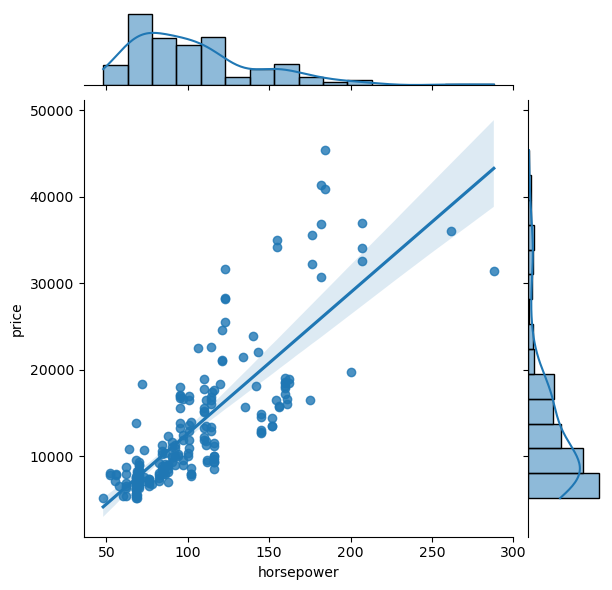

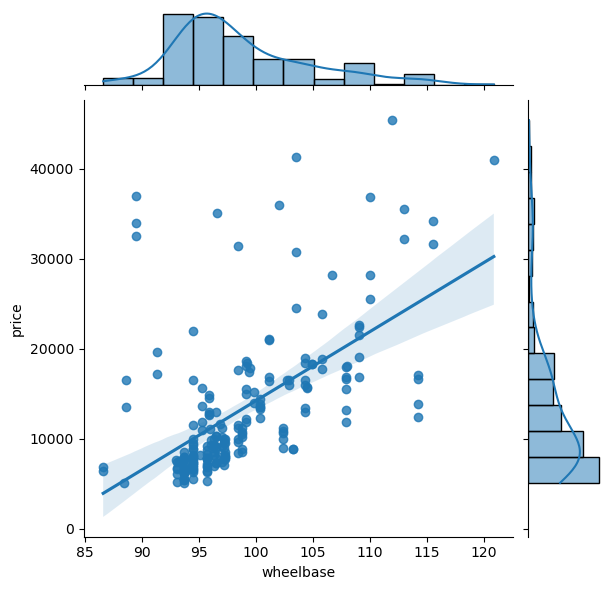

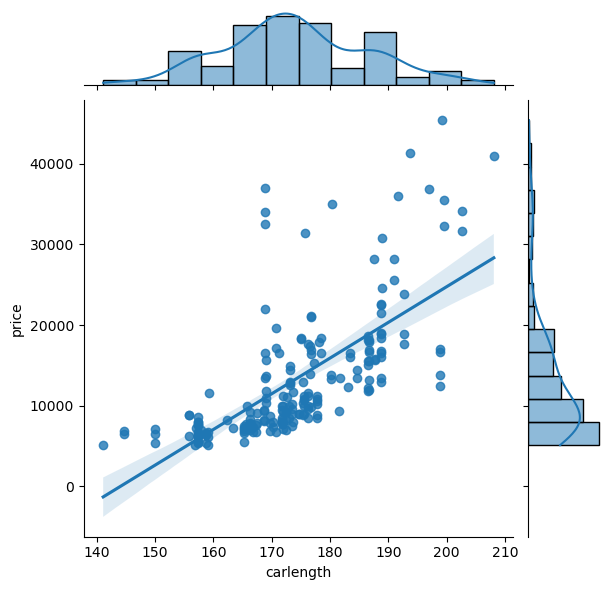

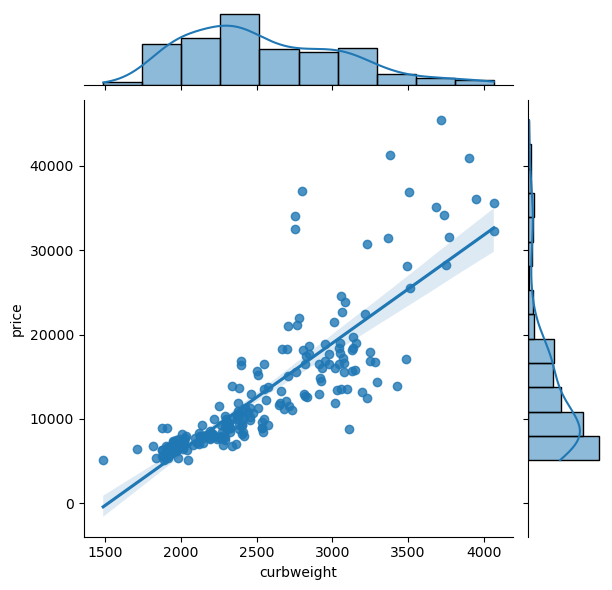

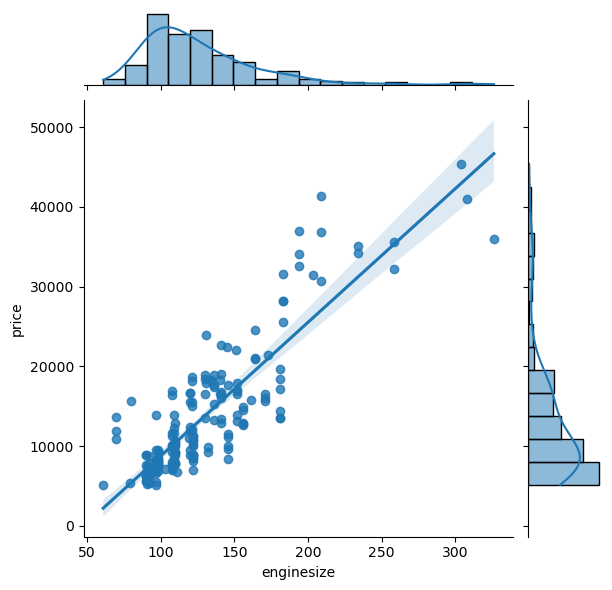

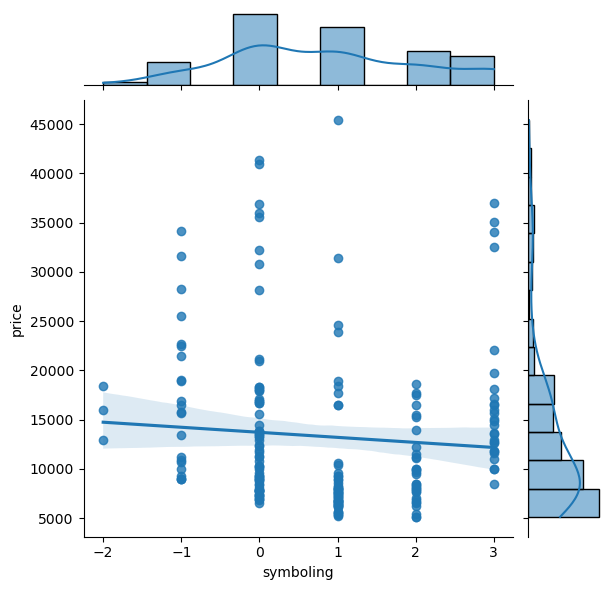

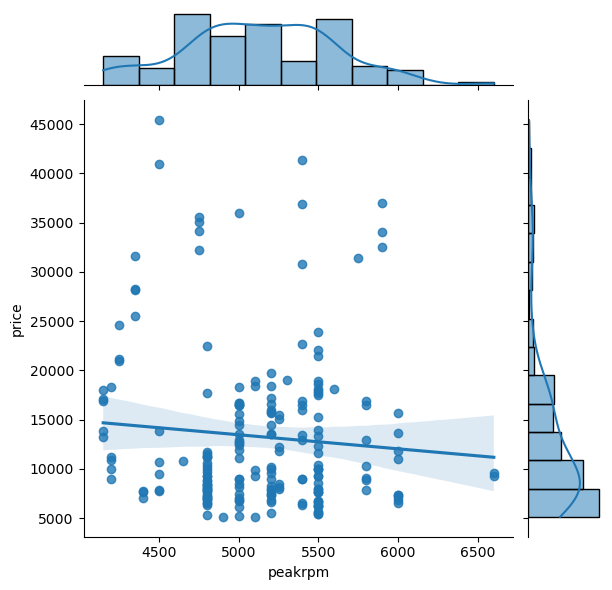

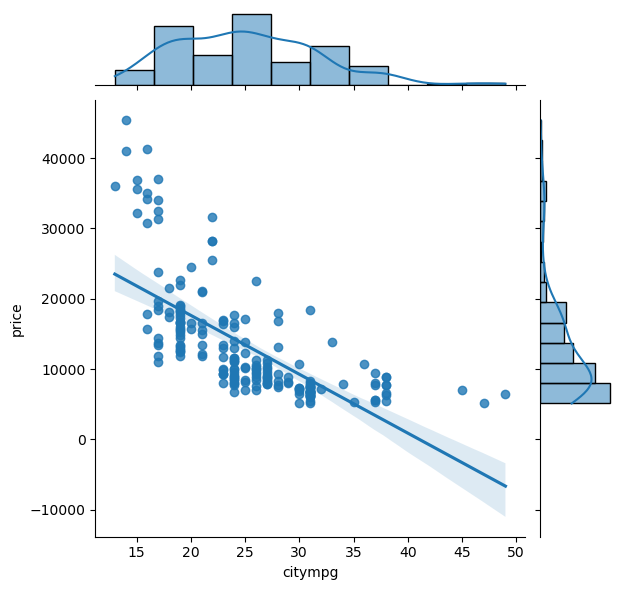

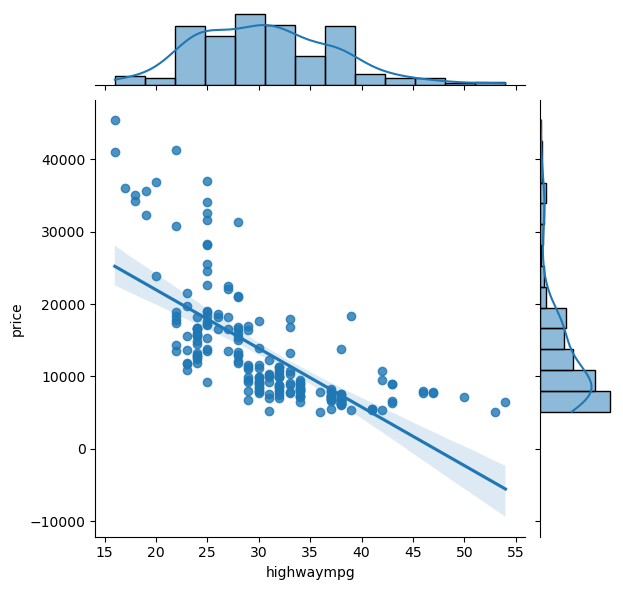

In [42]:
sns.boxplot(x=dframe['enginesize'], y=dframe['fueltype'],data=dframe)
warnings.simplefilter(action='ignore', category=FutureWarning)
dframe.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.jointplot(x=dframe['horsepower'],y=dframe['price'],data=dframe,kind='reg')
#sns.jointplot(x='fueltype', y='price', data=dframe, kind='scatter')
#sns.jointplot(x=dframe['doornumber'],y=dframe['price'],data=dframe)
sns.jointplot(x=dframe['wheelbase'],y=dframe['price'],data=dframe,kind='reg')
sns.jointplot(x=dframe['carlength'],y=dframe['price'],data=dframe,kind='reg')
#sns.jointplot(x=dframe['carwidth'],y=dframe['price'],data=dframe,kind='reg')
#sns.jointplot(x=dframe['carheight'],y=dframe['price'],data=dframe,kind='reg')
sns.jointplot(x=dframe['curbweight'],y=dframe['price'],data=dframe,kind='reg')
#sns.jointplot(x=dframe['enginetype'],y=dframe['price'],data=dframe,kind='scatter')
#sns.jointplot(x=dframe['cylindernumber'],y=dframe['price'],data=dframe)
sns.jointplot(x=dframe['enginesize'],y=dframe['price'],data=dframe,kind='reg')
sns.jointplot(x=dframe['symboling'],y=dframe['price'],data=dframe,kind='reg')
#sns.jointplot(x=dframe['peakrpm'],y=dframe['price'],data=dframe,kind='reg')
sns.jointplot(x=dframe['citympg'],y=dframe['price'],data=dframe,kind='reg')
sns.jointplot(x=dframe['highwaympg'],y=dframe['price'],data=dframe,kind='reg')

## Data Processing

Dealing with nan values, feature engineering and converting categorical data into numerical

In [43]:
def data_processing(df) :
    df['fueltype_numeric'] = df['fueltype'].map({'diesel': 0, 'gas': 1})
    df['aspiration_numeric'] = df['aspiration'].map({'std': 0, 'turbo': 1})
    df['doornumber_numeric'] = df['doornumber'].map({'four': 4, 'two': 2})
    df['enginelocation_numeric'] = df['enginelocation'].map({'front': 0, 'rear': 1})
    X=df[['fueltype_numeric', 'aspiration_numeric','doornumber_numeric','enginelocation_numeric','wheelbase','carlength','carwidth','carheight','enginesize','boreratio','stroke','compressionratio','horsepower','citympg','highwaympg']]
    X=np.array(X)
    X[:, 5] = np.square(X[:, 5]) 
    print(X.shape)
    print(np.any(np.isnan(X)))
    print(np.any(np.isinf(X)))
    return X

In [44]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  205 non-null    int64  
 1   symboling               205 non-null    int64  
 2   CarName                 205 non-null    object 
 3   fueltype                205 non-null    object 
 4   aspiration              205 non-null    object 
 5   doornumber              205 non-null    object 
 6   carbody                 205 non-null    object 
 7   drivewheel              205 non-null    object 
 8   enginelocation          205 non-null    object 
 9   wheelbase               205 non-null    float64
 10  carlength               205 non-null    float64
 11  carwidth                205 non-null    float64
 12  carheight               205 non-null    float64
 13  curbweight              205 non-null    int64  
 14  enginetype              205 non-null    ob

In [45]:
dframe.isnull().sum()

car_ID                    0
symboling                 0
CarName                   0
fueltype                  0
aspiration                0
doornumber                0
carbody                   0
drivewheel                0
enginelocation            0
wheelbase                 0
carlength                 0
carwidth                  0
carheight                 0
curbweight                0
enginetype                0
cylindernumber            0
enginesize                0
fuelsystem                0
boreratio                 0
stroke                    0
compressionratio          0
horsepower                0
peakrpm                   0
citympg                   0
highwaympg                0
price                     0
fueltype_numeric          0
aspiration_numeric        0
doornumber_numeric        0
enginelocation_numeric    0
dtype: int64

## Normalizing the data

In [46]:
def normalize(X) : 
    mean = np.mean(X, axis = 0, keepdims = True)
    s = np.std(X, axis = 0, keepdims = True)
    X = (X - mean) / s
    print(X.shape)
    return X

In [47]:
x_processed = data_processing(dframe)
x_processed = normalize(x_processed)
y = np.array(dframe[["price"]])
print(y.shape)

(205, 15)
False
False
(205, 15)
(205, 1)


## Splitting the data

In [48]:
def data_split(x_p, y_p, split_percent = 0.8) : 
    m_p = x_p.shape[0]
    temp = (int)(split_percent * m_p)
    x_t = x_p[:temp, :]
    x_c = x_p[temp : , :]
    y_t = y_p[:temp, :]
    y_c = y_p[temp: , :]
    return x_t, y_t, x_c, y_c

In [49]:
x_train, y_train, x_cv, y_cv = data_split(x_processed, y)
print("x_train shape : " + str(x_train.shape))
print("y_train shape : " + str(y_train.shape))
print("x_cv shape : " + str(x_cv.shape))
print("y_cv shape : " + str(y_cv.shape))

x_train shape : (164, 15)
y_train shape : (164, 1)
x_cv shape : (41, 15)
y_cv shape : (41, 1)


## Multivariate Linear Regression Model

In [50]:
def initialize_params(n_f) : 
    bf = 0.0
    thetaf = np.random.randn(n_f, 1)
    return thetaf, bf

In [51]:
def predict(x, theta, b) : 
    h = np.dot(x, theta) + b
    return h

In [52]:
def compute_cost(n_m, x, y, theta, b, lambd = 0) :
    p = predict(x, theta, b)
    j = (np.sum((p - y)**2) + (lambd * np.sum(np.dot(theta.T, theta))))/(2*n_m)
    return j

In [53]:
def gradient_descent(x, y, theta, b, learning_rate = 0.1, iter = 1000, lambd = 0) :
    n_m = x.shape[0]
    c = []
    for i in range(iter) : 
        p = predict(x, theta, b)
        theta = theta - (learning_rate / n_m) * (np.dot(x.T, (p - y)) + lambd * theta)
        b = b - (learning_rate/n_m) * np.sum(p - y)
        if(i%10 == 0) : 
            cost = compute_cost(n_m, x, y, theta, b, lambd)
            c.append(cost)
            print("Cost after "+ str(i) + " iteration : " + str(cost))
    c = np.squeeze(c)
    plt.plot(c)
    plt.show()
    return theta, b

In [54]:
def model(x_train, y_train, x_cv, y_cv, learning_rate = 0.1, iter = 1000, lambd = 0) : 
    nf = x_train.shape[1]
    theta, b = initialize_params(nf)
    theta, b = gradient_descent(x_train, y_train, theta, b, learning_rate, iter, lambd)
    y_train_predict = predict(x_train, theta, b)
    y_cv_predict = predict(x_cv, theta, b)
    
    accuracy_test = 100 - (np.mean(np.abs(y_train_predict - y_train) / y_train * 100))
    accuracy_cv = 100 - (np.mean(np.abs(y_cv_predict - y_cv) / y_cv * 100))
    print("Test Case accuracy : " + str(accuracy_test) + " %")
    print("Cross validation accuracy : " + str(accuracy_cv) + " %")
    return theta, b

Cost after 0 iteration : 104824728.32584842
Cost after 10 iteration : 36304848.571344405
Cost after 20 iteration : 16057173.070644865
Cost after 30 iteration : 8719809.058093686
Cost after 40 iteration : 6010370.242667412
Cost after 50 iteration : 4991722.890147368
Cost after 60 iteration : 4597990.197273215
Cost after 70 iteration : 4438675.689727523
Cost after 80 iteration : 4369335.265447019
Cost after 90 iteration : 4335817.639037173
Cost after 100 iteration : 4317398.6611826625
Cost after 110 iteration : 4305886.0271928925
Cost after 120 iteration : 4297877.033233021
Cost after 130 iteration : 4291855.120790163
Cost after 140 iteration : 4287080.895749703
Cost after 150 iteration : 4283156.428281113
Cost after 160 iteration : 4279846.657202969
Cost after 170 iteration : 4277001.65307171
Cost after 180 iteration : 4274520.069974244


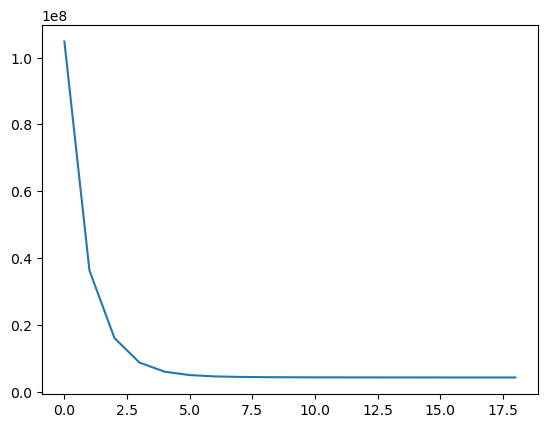

Test Case accuracy : 82.85877828454396 %
Cross validation accuracy : 78.65797230363063 %


In [55]:
theta1, b1 = model(x_train, y_train, x_cv, y_cv, learning_rate = 0.05, iter = 181)
#print("theta final : " + str(theta1))
#print("b final : " + str(b1))

In [56]:
prediction_train = predict(x_train, theta1, b1)
prediction_cv = predict(x_cv, theta1, b1)

## Sklearn Linear Regression Model

In [59]:
cls = linear_model.LinearRegression()
cls.fit(x_train, y_train)
predict1 = cls.predict(x_cv)
print("cv RMSE:", np.sqrt(mean_squared_error(np.log(y_cv),np.log(predict1))))

cv RMSE: 0.23419075964238933


## Random Forest Regressor

In [60]:
clf1 = RandomForestRegressor(n_estimators = 500)
y_train = y_train.reshape(-1)
clf1.fit(x_train, y_train)
y_pred1 = clf1.predict(x_cv)
print("cv RMSE:", np.sqrt(mean_squared_error(np.log(y_cv),np.log(y_pred1))))

cv RMSE: 0.1742748762933019


In [61]:
print("Train Score : ", clf1.score(x_train, y_train))
print("Test Score : ", clf1.score(x_cv, y_cv))

Train Score :  0.9871270477491867
Test Score :  0.6658389204191647
